Инструментарий:


*   Python
*   NLTK
*   SKLearn
*   Pandas


# Модель Bag-of-Words

Простым подходом к анализу текстов является векторизация. Она позволяет перевести текст в цифровой вид и применять весь арсенал методов машинного обучения.
Одним из способов является модель мешка слов Bag-of-Words, BoW. При переходе к ней теряется порядок следования слов, а учитывается лишь частота их применения в дкументе.
Принцип модели очень прост. Формирется матрица, где по строкам идут документы, а по столбцам все слова корпуса (обычно упорядоченные по алфавиту). В ячейках фиксируется число применения слова в документе.
Перед примением модели разумно провести очистку текста, удаление стоп-слов, лемматизацию или стемминг.

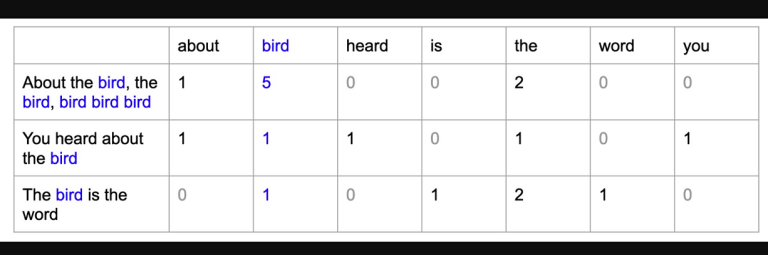

In [ ]:
# подготовительные элементы
from nltk import word_tokenize
from nltk.stem import SnowballStemmer

import string
def tokenize(text):
  stemmer = SnowballStemmer('russian')
  text = text.lower()
  return [stemmer.stem(token) for token in  word_tokenize(text) if not token in string.punctuation]

corpus = [
  "Космический корабаль Crew Dragon был запущен ракетой Фалькон к международной космической станции",
 "Космический телескоп Джеймс Уэбб выведен на обриту и начал передавать первые снимки далеких космических объектов",
  "Заправочная станция открылась в нашем районе. Цены космические."
]
tokenize(corpus[0])

['космическ',
 'корабал',
 'crew',
 'dragon',
 'был',
 'запущ',
 'ракет',
 'фалькон',
 'к',
 'международн',
 'космическ',
 'станц']

In [ ]:
# Пример векторизации средствами Python
from collections import defaultdict
def vectorize(doc):
  features = defaultdict(int)
  for token in tokenize(doc):
    features[token] += 1
  return features
vectors = [vectorize(doc) for doc in corpus]
vectors

[defaultdict(int,
             {'космическ': 2,
              'корабал': 1,
              'crew': 1,
              'dragon': 1,
              'был': 1,
              'запущ': 1,
              'ракет': 1,
              'фалькон': 1,
              'к': 1,
              'международн': 1,
              'станц': 1}),
 defaultdict(int,
             {'космическ': 2,
              'телескоп': 1,
              'джеймс': 1,
              'уэбб': 1,
              'вывед': 1,
              'на': 1,
              'обрит': 1,
              'и': 1,
              'нача': 1,
              'передава': 1,
              'перв': 1,
              'снимк': 1,
              'далек': 1,
              'объект': 1}),
 defaultdict(int,
             {'заправочн': 1,
              'станц': 1,
              'откр': 1,
              'в': 1,
              'наш': 1,
              'район': 1,
              'цен': 1,
              'космическ': 1})]

Используем теперь для построения мешка слов встроенные инструменты библиотеки машинного обучения SKLearn.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)
vectors

<3x31 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [ ]:
# результат векторизации
vectors.toarray()

array([[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1]])

In [ ]:
# словарь, полученный на основе корпуса
vectorizer.vocabulary_

{'космический': 10,
 'корабаль': 8,
 'crew': 0,
 'dragon': 1,
 'был': 2,
 'запущен': 7,
 'ракетой': 23,
 'фалькон': 29,
 'международной': 13,
 'космической': 12,
 'станции': 25,
 'телескоп': 27,
 'джеймс': 5,
 'уэбб': 28,
 'выведен': 3,
 'на': 14,
 'обриту': 17,
 'начал': 15,
 'передавать': 21,
 'первые': 20,
 'снимки': 24,
 'далеких': 4,
 'космических': 11,
 'объектов': 18,
 'заправочная': 6,
 'станция': 26,
 'открылась': 19,
 'нашем': 16,
 'районе': 22,
 'цены': 30,
 'космические': 9}

In [ ]:
# Мы можем преобразовать модель к датафрейму Pandas
import pandas as pd
pd.DataFrame(vectors.toarray(), columns=vectorizer.vocabulary_.keys())

,космический,корабаль,crew,dragon,был,запущен,ракетой,фалькон,международной,космической,...,далеких,космических,объектов,заправочная,станция,открылась,нашем,районе,цены,космические
0,1,1,1,0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,1,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1


 Перед применением векторизации стоит провести стемминг средствами NLTK. Внести соответсвующее испраление в данный пример

In [ ]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Создание объекта стеммера Porter
stemmer = PorterStemmer()

# Функция для стемминга текста
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Применение стемминга к каждому документу в корпусе
stemmed_corpus = [stem_text(doc) for doc in corpus]

# Создание объекта CountVectorizer для создания матрицы частот слов
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(stemmed_corpus)

# Вывод векторов в виде DataFrame с использованием соответствующих ключей словаря
pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

,crew,dragon,был,выведен,далеких,джеймс,заправочная,запущен,корабаль,космические,...,передавать,районе,ракетой,снимки,станции,станция,телескоп,уэбб,фалькон,цены
0,1,1,1,0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,1,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1


# Частота слова — обратная частота документа TF-IDF

In [ ]:
# проведем построегние модели с примененеим метрики TF-IDF сроедствами SKlearn
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(stop_words='english')
vectors = tfidf_vec.fit_transform(corpus)

In [ ]:
vectors.toarray()

array([[0.30746099, 0.30746099, 0.30746099, 0.        , 0.        ,
        0.        , 0.        , 0.30746099, 0.30746099, 0.        ,
        0.23383201, 0.        , 0.30746099, 0.30746099, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.30746099, 0.        ,
        0.30746099, 0.        , 0.        , 0.        , 0.30746099,
        0.        ],
       [0.        , 0.        , 0.        , 0.27137867, 0.27137867,
        0.27137867, 0.        , 0.        , 0.        , 0.        ,
        0.20639047, 0.27137867, 0.        , 0.        , 0.27137867,
        0.27137867, 0.        , 0.27137867, 0.27137867, 0.        ,
        0.27137867, 0.27137867, 0.        , 0.        , 0.27137867,
        0.        , 0.        , 0.27137867, 0.27137867, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37796447, 0.        , 0.        , 0.37796447,
      

In [ ]:
# Мы можем преобразовать модель к датафрейму Pandas
import pandas as pd
pd.DataFrame(vectors.toarray(), columns=vectorizer.vocabulary_.keys())

,космический,корабаль,crew,dragon,был,запущен,ракетой,фалькон,международной,космической,...,далеких,космических,объектов,заправочная,станция,открылась,нашем,районе,цены,космические
0,0.307461,0.307461,0.307461,0.000000,0.000000,0.000000,0.000000,0.307461,0.307461,0.000000,...,0.000000,0.000000,0.307461,0.000000,0.307461,0.000000,0.000000,0.000000,0.307461,0.000000
1,0.000000,0.000000,0.000000,0.271379,0.271379,0.271379,0.000000,0.000000,0.000000,0.000000,...,0.271379,0.000000,0.000000,0.271379,0.000000,0.000000,0.271379,0.271379,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.377964,...,0.000000,0.377964,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,0.377964


Перед применением векторизации стоит провести стемминг средствами NLTK. Внести соответсвующее испраление в данный пример

In [ ]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Создание объекта стеммера Porter
stemmer = PorterStemmer()

# Функция для стемминга текста
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Применение стемминга к каждому документу в корпусе
stemmed_corpus = [stem_text(doc) for doc in corpus]

# Создание объекта TfidfVectorizer с указанием стоп-слов и использованием стемминга
tfidf_vec = TfidfVectorizer(stop_words='english')
vectors = tfidf_vec.fit_transform(stemmed_corpus)

# Вывод векторов в виде DataFrame с использованием соответствующих ключей словаря
pd.DataFrame(vectors.toarray(), columns=tfidf_vec.get_feature_names_out())

,crew,dragon,был,выведен,далеких,джеймс,заправочная,запущен,корабаль,космические,...,передавать,районе,ракетой,снимки,станции,станция,телескоп,уэбб,фалькон,цены
0,0.307461,0.307461,0.307461,0.000000,0.000000,0.000000,0.000000,0.307461,0.307461,0.000000,...,0.000000,0.000000,0.307461,0.000000,0.307461,0.000000,0.000000,0.000000,0.307461,0.000000
1,0.000000,0.000000,0.000000,0.271379,0.271379,0.271379,0.000000,0.000000,0.000000,0.000000,...,0.271379,0.000000,0.000000,0.271379,0.000000,0.000000,0.271379,0.271379,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.377964,...,0.000000,0.377964,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,0.377964


# Определение схожести документов

Модель мешка слов с метрикой TF-IDF можно использовать для определения близости двух документов, а также, например, для кластерного анализа текстов

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Создание набора данных с несколькими текстовыми документами
corpus = [
  "Космический корабаль Crew Dragon был запущен ракетой Фалькон к международной космической станции",
  "Космический телескоп Джеймс Уэбб выведен на обриту и начал передавать первые снимки далеких космических объектов",
  "Заправочная станция открылась в нашем районе. Цены космические.",
  "Ракета-носитель Союз успешно вывела на орбиту космический корабль с 3 космонавтами и он направилсяк международной космической станции",
  "Корабль Прогресс доставил космонавтам свежие продукты",
  "Продукты питания в нашем кафе самые лучшие и свежие",
  "нет никаких сомнений в успешности новго сериала про жизнь молодых гитаристок",
  "станция нашего радио передает песни друзьям",
  "сегодня футбольный матч отменен из-за погодных условий",
  "новый метеорологический спутник выведенный на орбиту сделает прогноз погоды более точным"
]
# Токенизация текста
nltk.download('punkt')
tokenized_documents = [nltk.word_tokenize(doc) for doc in corpus]

# Создание модели TF-IDF для извлечения признаков
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Вычисление меры схожести (косинусное расстояние) между документами
similarity_matrix = cosine_similarity(tfidf_matrix)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
similarity_matrix

array([[1.        , 0.04900414, 0.        , 0.24470958, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.04900414, 1.        , 0.        , 0.08568104, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.04766317],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.11461416, 0.        , 0.11899001, 0.        , 0.        ],
       [0.24470958, 0.08568104, 0.        , 1.        , 0.0891324 ,
        0.        , 0.        , 0.        , 0.        , 0.11159262],
       [0.        , 0.        , 0.        , 0.0891324 , 1.        ,
        0.25599436, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.11461416, 0.        , 0.25599436,
        1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.1189900

 Применить стемминг.

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Создание объекта стеммера Porter
stemmer = PorterStemmer()

# Функция для стемминга текста
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Применение стемминга к каждому документу в корпусе
stemmed_corpus = [stem_text(doc) for doc in corpus]

# Токенизация текста после стемминга
tokenized_documents = [nltk.word_tokenize(doc) for doc in stemmed_corpus]

# Создание модели TF-IDF для извлечения признаков
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(stemmed_corpus)

# Вывод матрицы схожести
print(similarity_matrix)

[[1.         0.04900414 0.         0.24470958 0.         0.
  0.         0.         0.         0.        ]
 [0.04900414 1.         0.         0.08568104 0.         0.
  0.         0.         0.         0.04766317]
 [0.         0.         1.         0.         0.         0.11461416
  0.         0.11899001 0.         0.        ]
 [0.24470958 0.08568104 0.         1.         0.0891324  0.
  0.         0.         0.         0.11159262]
 [0.         0.         0.         0.0891324  1.         0.25599436
  0.         0.         0.         0.        ]
 [0.         0.         0.11461416 0.         0.25599436 1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [0.         0.         0.11899001 0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.         0.047663

<Axes: >

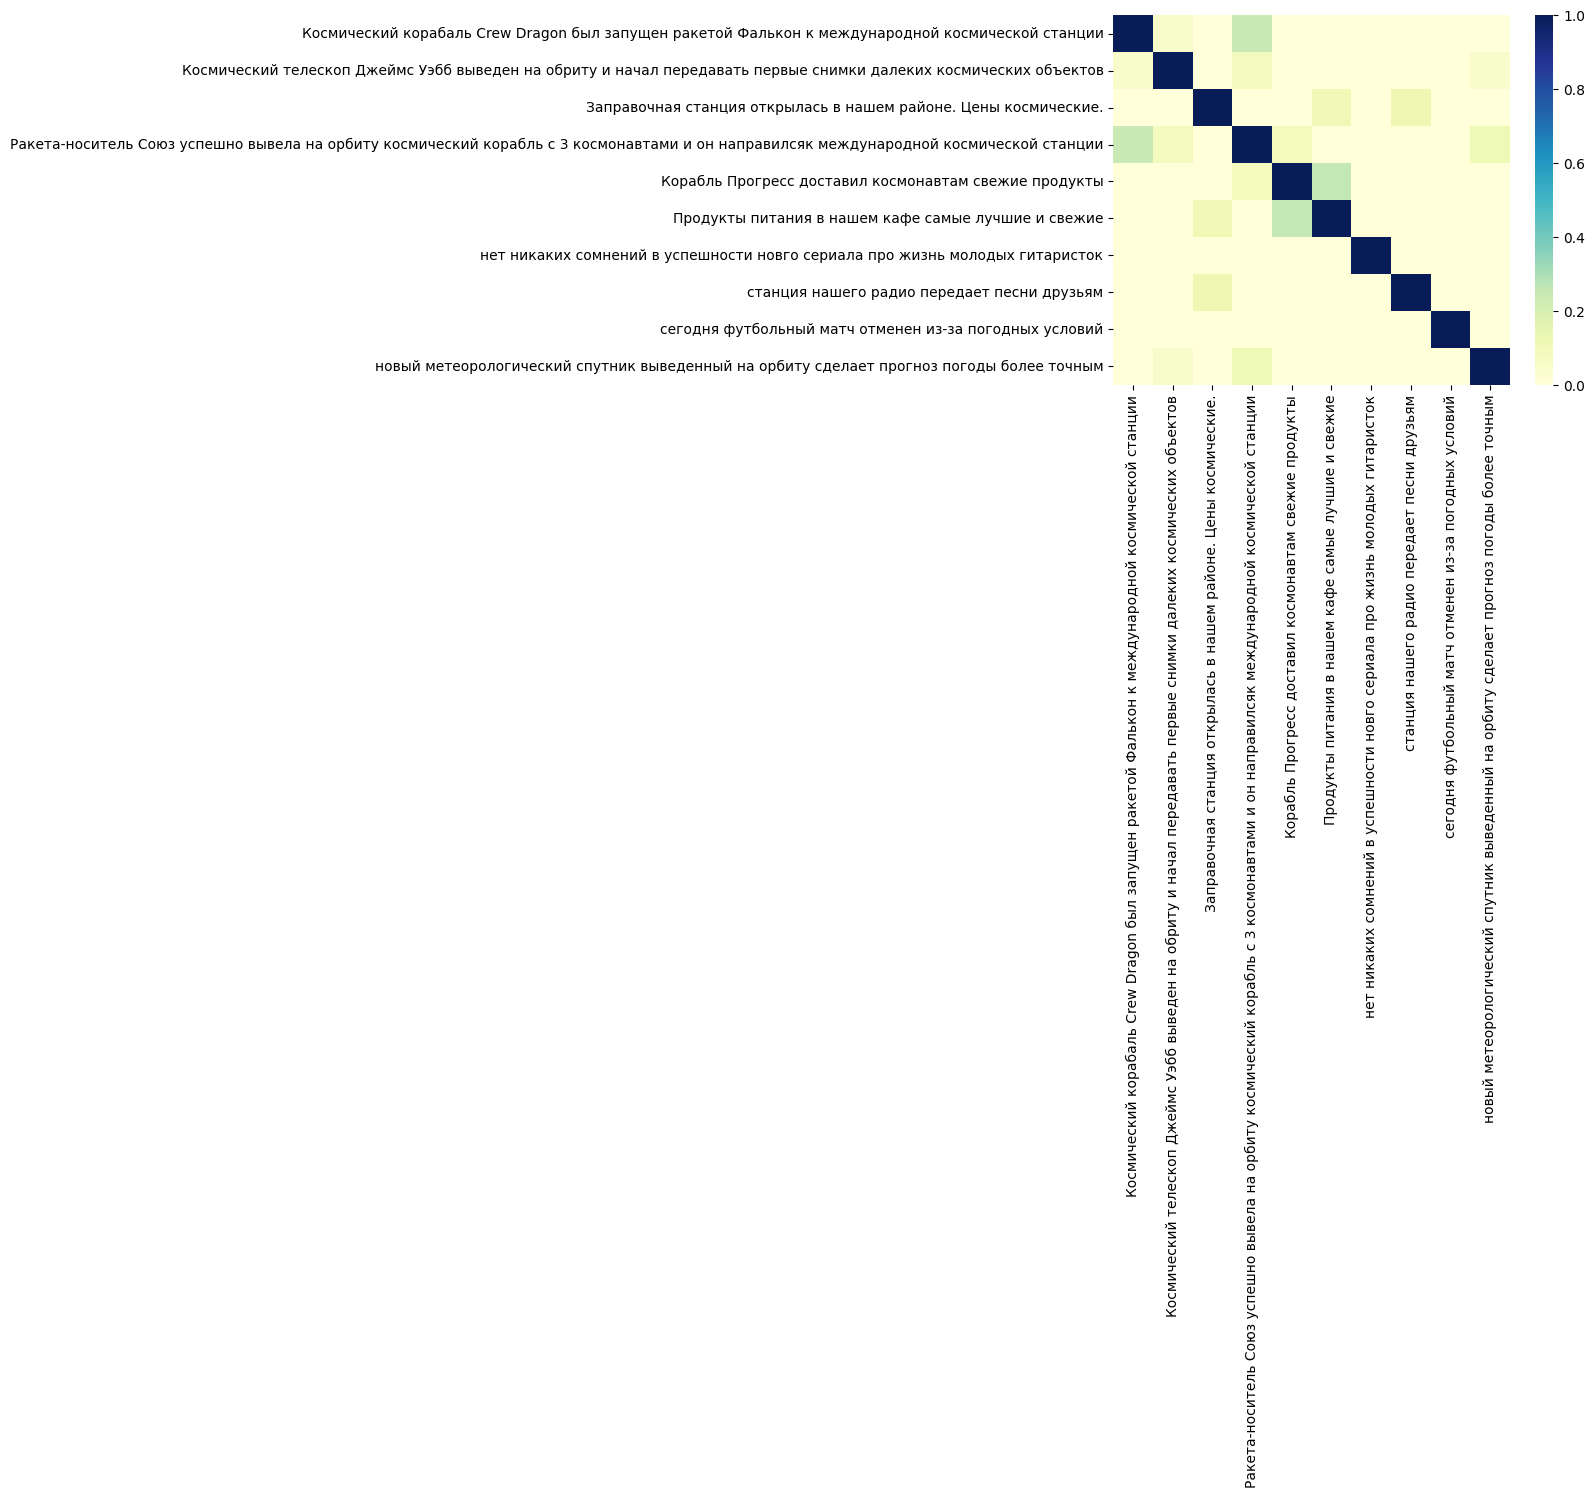

In [ ]:
# Визуализация результатов
import seaborn as sns
sns.heatmap(similarity_matrix, cmap="YlGnBu", xticklabels=corpus, yticklabels=corpus)


 Улучшить внешний вид графика. Выводить документы не полностью, а только первые 50 символов

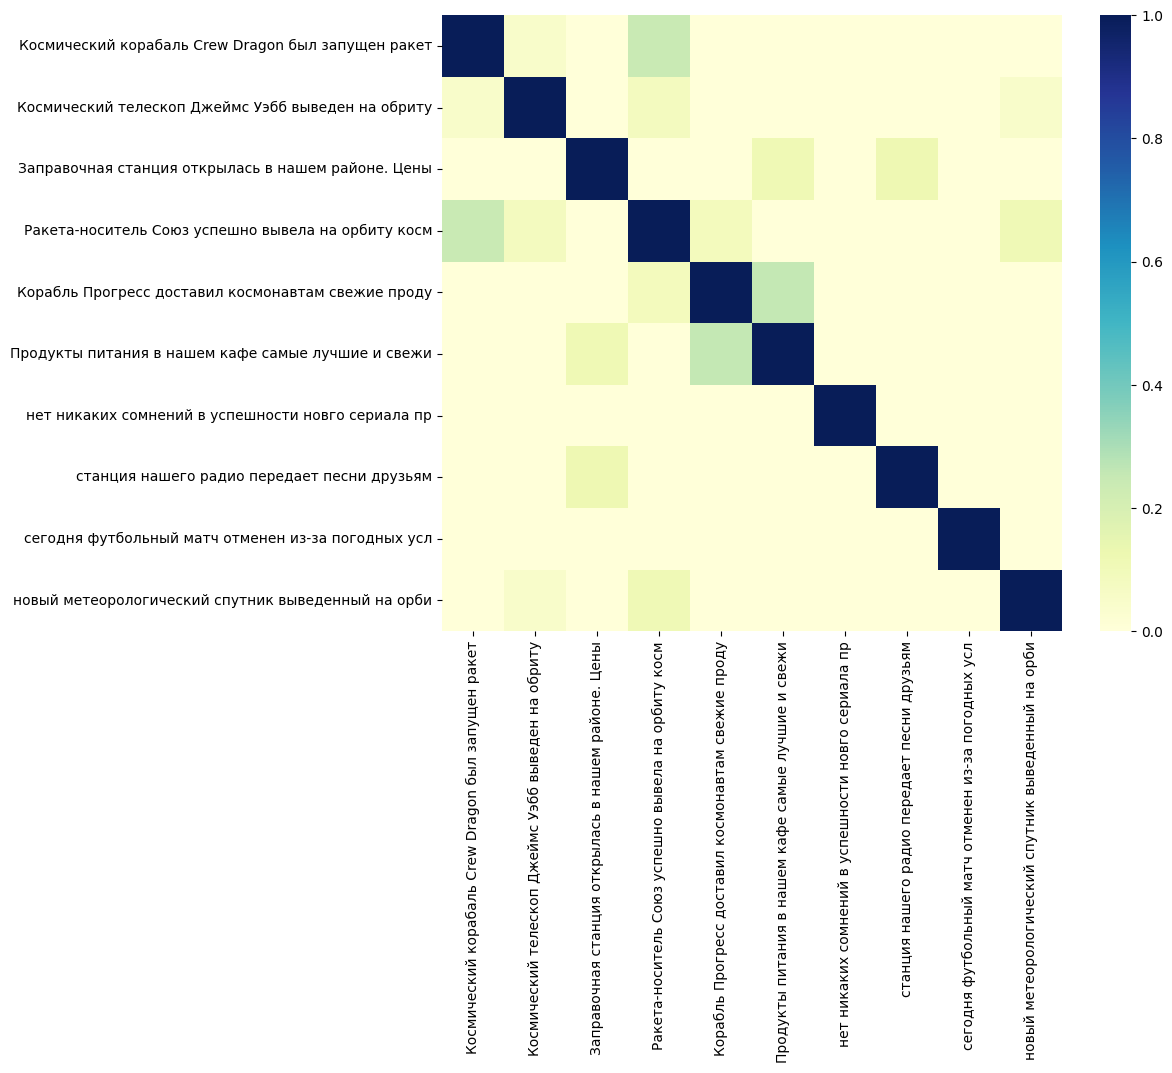

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Отображение только первых 50 символов документов
corpus_short = [doc[:50] for doc in corpus]

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="YlGnBu", xticklabels=corpus_short, yticklabels=corpus_short)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(tfidf_matrix)
kmeans.labels_

array([2, 2, 0, 2, 0, 0, 2, 2, 1, 2], dtype=int32)

# Применение машинного обучения на основе модели BoW

In [ ]:
# будем использовать массив рецензий на фильмы, приведенный в NLTK
# проведем преобразование для дальнейшего анализа
# нам потребуется по тексту рецензии определить негативный или позитивный хакартер отзыва
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
movie_reviews
documents = [(' '.join(list(movie_reviews.words(fileid))), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
documents[:3]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


[('plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what \' s the deal ? watch the movie and " sorta " find out . . . critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn \' t snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it \' s simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have n

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Подготовка данных
texts = [doc for  doc,_ in documents]
labels = [1 if category == 'pos' else 0 for _,category in documents]

# Создание BoW модели
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(texts)

# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(bow, labels, test_size=0.2)

# Обучение классификатора
# Используем алгоритм Наивный Байес
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Оценка классификатора
predictions = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.7925


Вывести матрицу ошибок модели



In [ ]:
from sklearn.metrics import confusion_matrix

# Оценка классификатора
predictions = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7925
Confusion Matrix:
[[162  40]
 [ 43 155]]


 Определить для произвольного текста рецензии является ли он положительным или отрицательным

In [ ]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
movie_reviews
documents = [(' '.join(list(movie_reviews.words(fileid))), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
documents[:7]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


[('plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what \' s the deal ? watch the movie and " sorta " find out . . . critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn \' t snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it \' s simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have n